In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from collections import Counter
from nltk.stem import PorterStemmer, LancasterStemmer

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Zero/nltk_data'
    - 'c:\\Users\\Zero\\anaconda3\\nltk_data'
    - 'c:\\Users\\Zero\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\Zero\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Zero\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [63]:
df = pd.read_csv (r'E:\IMDBDataset.csv')
df.shape

(50000, 2)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [65]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [66]:
df.sentiment.replace("negative", 0, inplace=True)
df.sentiment.replace("positive", 1, inplace=True)

In [67]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


Text(0.5, 1.0, 'Sentiment distribution')

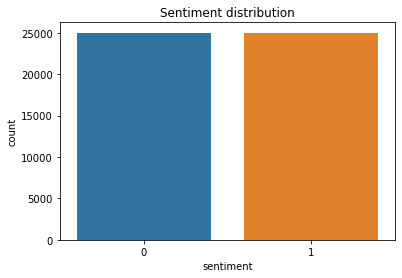

In [68]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [69]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  418


In [70]:
df = df.drop_duplicates('review')

In [71]:
def text_processing(x):
     x = x.lower()
     x = re.sub('<br />','', x)
     x = re.sub(r"https\S+|www\S+|http\S+", '', x, flags = re.MULTILINE)
     x = re.sub(r'\@w+|\#', '', x)
     x = re.sub(r'[^\w\s]','',x)
     x_tokens = word_tokenize(x)
     x_filtered = [i for i in x_tokens if not i in stop_words]
     return " ".join(x_filtered)


In [72]:
df.review = df['review'].apply (text_processing)

In [73]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [74]:
df.review = df['review'].apply(lambda x: stemming(x))

In [75]:
negative_reviews =  df[df.sentiment == 0]
negative_reviews.head()

,review,sentiment
3,basically theres family little boy jake thinks...,0
7,show amazing fresh innovative idea 70s first a...,0
8,encouraged positive comments film looking forw...,0
10,phil alien one quirky films humour based aroun...,0
11,saw movie 12 came recall scariest scene big bi...,0


In [76]:
count = Counter()
for text in negative_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(10)

[('movie', 47011),
 ('film', 34651),
 ('one', 24364),
 ('like', 21509),
 ('even', 14761),
 ('good', 13997),
 ('bad', 13906),
 ('would', 13483),
 ('really', 12084),
 ('time', 11350)]

In [77]:
negativeWords = pd.DataFrame(count.most_common(10))
negativeWords.columns = ['Words', 'Count Number']
negativeWords.head(10)

,Words,Count Number
0,movie,47011
1,film,34651
2,one,24364
3,like,21509
4,even,14761
5,good,13997
6,bad,13906
7,would,13483
8,really,12084
9,time,11350


In [78]:
positive_reviews =  df[df.sentiment == 1]
positive_reviews.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
4,petter matteis love time money visually stunni...,1
5,probably alltime favorite movie story selfless...,1


In [79]:
count = Counter()
for text in positive_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(10)

[('film', 39285),
 ('movie', 35836),
 ('one', 25621),
 ('like', 16999),
 ('good', 14286),
 ('great', 12570),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10933)]

In [80]:
positiveWords = pd.DataFrame(count.most_common(10))
positiveWords.columns = ['Words', 'Count Number']
positiveWords.head(10)

,Words,Count Number
0,film,39285
1,movie,35836
2,one,25621
3,like,16999
4,good,14286
5,great,12570
6,story,12338
7,see,11814
8,time,11724
9,well,10933


In [81]:
X = df['review']
Y = df['sentiment']

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [84]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((34707, 221707), (14875, 221707), (34707,), (14875,))

In [119]:
DT=DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)
DT_pred = DT.predict(x_test)
print("Accuracy on the test set: ", accuracy_score(y_test, DT_pred)*100 ,"%")

Accuracy on the test set:  71.92605042016807 %


In [120]:
cross_val_score(DT, x_train.reshape((34707, -1)), y_train, cv=7)

array([0.7138536 , 0.71500605, 0.71177894, 0.70532473, 0.70008068,
       0.70512303, 0.71117386])

Accuracy on the test set:  71.92605042016807 % 

[[0.35690756 0.13936134]
 [0.14137815 0.36235294]] 

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      7382
           1       0.72      0.72      0.72      7493

    accuracy                           0.72     14875
   macro avg       0.72      0.72      0.72     14875
weighted avg       0.72      0.72      0.72     14875



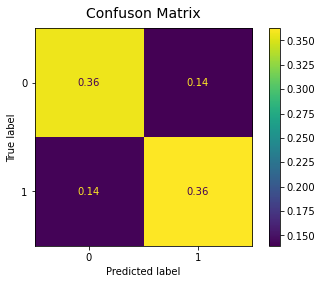

In [121]:
print("Accuracy on the test set: ", accuracy_score(y_test, DT_pred)*100,"%","\n")
print(confusion_matrix(y_test, DT_pred)/ len(y_test),"\n")
print(classification_report(y_test, DT_pred))

ConfusionMatrixDisplay.from_estimator(DT, x_test, y_test, normalize='all')
plt.title("Confuson Matrix", y=1.02, size=14)
plt.show()

In [101]:
log_reg = LogisticRegression().fit(x_train, y_train)
logreg_pred = log_reg.predict(x_test)
print("Accuracy on the test set: ", accuracy_score(y_test, logreg_pred)*100 ,"%")

Accuracy on the test set:  89.43865546218488 %


In [95]:
cross_val_score(log_reg, x_train.reshape((34707, -1)), y_train, cv=7)

array([0.89130873, 0.8914885 , 0.89068173, 0.88705123, 0.88846309,
       0.89491731, 0.88866478])

Accuracy on the test set:  89.43865546218488 % 

[[0.4347563  0.06151261]
 [0.04410084 0.45963025]] 

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      7382
           1       0.88      0.91      0.90      7493

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875



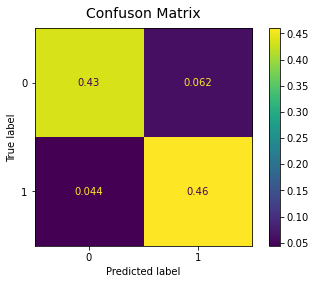

In [108]:
print("Accuracy on the test set: ", accuracy_score(y_test, logreg_pred)*100,"%","\n")
print(confusion_matrix(y_test, logreg_pred)/ len(y_test),"\n")
print(classification_report(y_test, logreg_pred))

ConfusionMatrixDisplay.from_estimator(log_reg, x_test, y_test, normalize='all')
plt.title("Confuson Matrix", y=1.02, size=14)
plt.show()

In [117]:
mnnb = MultinomialNB().fit(x_train, y_train)
mnb_pred = mnnb.predict(x_test)
print("Accuracy on the test set: ", accuracy_score(y_test, mnb_pred)*100 ,"%")

Accuracy on the test set:  86.2453781512605 %


In [114]:
cross_val_score(mnnb, x_train.reshape((34707, -1)), y_train, cv=7)

array([0.85904416, 0.87232755, 0.85599032, 0.86425978, 0.87010891,
       0.86970553, 0.86123437])

Accuracy on the test set:  86.2453781512605 % 

[[0.43038655 0.06588235]
 [0.07166387 0.43206723]] 

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7382
           1       0.87      0.86      0.86      7493

    accuracy                           0.86     14875
   macro avg       0.86      0.86      0.86     14875
weighted avg       0.86      0.86      0.86     14875



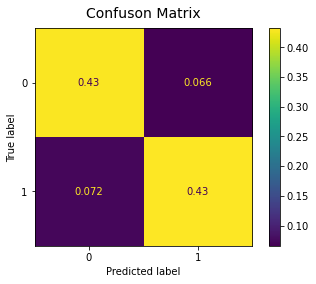

In [116]:
print("Accuracy on the test set: ", accuracy_score(y_test, mnb_pred)*100,"%","\n")
print(confusion_matrix(y_test, mnb_pred)/ len(y_test),"\n")
print(classification_report(y_test, mnb_pred))

ConfusionMatrixDisplay.from_estimator(mnnb, x_test, y_test, normalize='all')
plt.title("Confuson Matrix", y=1.02, size=14)
plt.show()

In [123]:
svvc = LinearSVC().fit(x_train, y_train)
svvc_pred = svvc.predict(x_test)
print("Accuracy on the test set: ", accuracy_score(y_test, svvc_pred)*100 ,"%")

Accuracy on the test set:  89.59327731092436 %


In [124]:
cross_val_score(svvc, x_train.reshape((34707, -1)), y_train, cv=7)

array([0.8840492 , 0.8880597 , 0.88584106, 0.89189189, 0.89794272,
       0.89673255, 0.89088342])

Accuracy on the test set:  89.59327731092436 % 

[[0.43885714 0.05741176]
 [0.04665546 0.45707563]] 

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7382
           1       0.89      0.91      0.90      7493

    accuracy                           0.90     14875
   macro avg       0.90      0.90      0.90     14875
weighted avg       0.90      0.90      0.90     14875



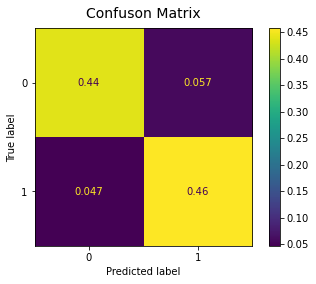

In [125]:
print("Accuracy on the test set: ", accuracy_score(y_test, svvc_pred)*100,"%","\n")
print(confusion_matrix(y_test, svvc_pred)/ len(y_test),"\n")
print(classification_report(y_test, svvc_pred))

ConfusionMatrixDisplay.from_estimator(svvc, x_test, y_test, normalize='all')
plt.title("Confuson Matrix", y=1.02, size=14)
plt.show()